<a href="https://colab.research.google.com/github/rajbeniwal710/Classification_Models/blob/main/naive_bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
pharma_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Training_set_begs.csv')
pharma_data = pharma_data.dropna()
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
pharma_data['Treated_with_drugs'] = le.fit_transform(pharma_data['Treated_with_drugs'])
#x-y 
x = pharma_data.iloc[:,:-1]
x = x.drop(['Patient_ID'], axis = 1)
y = pharma_data.iloc[:,-1]
#data cleaning
x = pd.get_dummies(x)
#lets drop some columns to drop dummy trap
x = x.drop(['Patient_Smoker_NO'], axis = 1)
x = x.drop(['Patient_Rural_Urban_URBAN'], axis = 1)
x = x.drop(['ID_Patient_Care_Situation'], axis = 1)
x = x.drop(['Patient_mental_condition_Stable'], axis = 1)
x.loc[x['Patient_Age']>100, 'Patient_Age'] = 100
import numpy as np
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
x['Treated_with_drugs'] = mms.fit_transform(np.array(x['Treated_with_drugs']).reshape(-1,1))
x['Diagnosed_Condition'] = mms.fit_transform(np.array(x['Diagnosed_Condition']).reshape(-1,1))
x['Patient_Age'] = mms.fit_transform(np.array(x['Patient_Age']).reshape(-1,1))
x['Patient_Body_Mass_Index'] = mms.fit_transform(np.array(x['Patient_Body_Mass_Index']).reshape(-1,1))
y = y.astype('category')

In [2]:
#train-validation split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [3]:
from sklearn.naive_bayes import GaussianNB

In [4]:
model = GaussianNB().fit(X_train,y_train)

In [5]:
from sklearn.metrics import classification_report, confusion_matrix 

In [6]:
y_pred = model.predict(X_train)
print("Classification report for train dataset - \n", classification_report(y_train,y_pred))

Classification report for train dataset - 
               precision    recall  f1-score   support

           0       0.63      0.46      0.53      5480
           1       0.72      0.84      0.78      9158

    accuracy                           0.70     14638
   macro avg       0.68      0.65      0.65     14638
weighted avg       0.69      0.70      0.69     14638



In [7]:
# Predicting the values of test data
y_pred = model.predict(X_test)
print("Classification report for test dataset - \n", classification_report(y_test,y_pred))

Classification report for test dataset - 
               precision    recall  f1-score   support

           0       0.66      0.47      0.55      2727
           1       0.72      0.85      0.78      4484

    accuracy                           0.71      7211
   macro avg       0.69      0.66      0.66      7211
weighted avg       0.70      0.71      0.69      7211



In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Accuracy Score: 0.706143392039939')

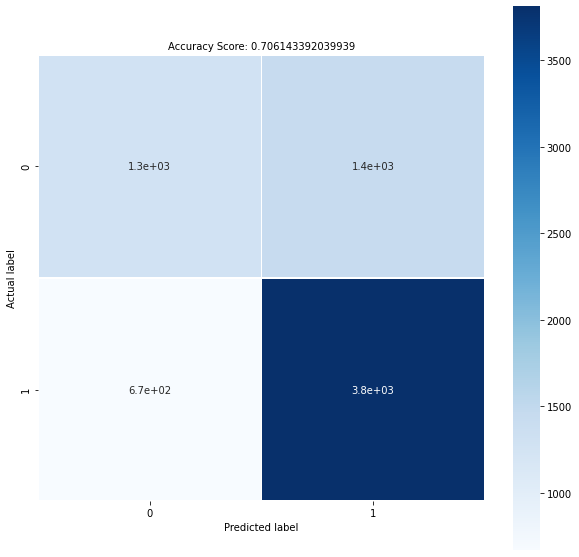

In [9]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,10))
sns.heatmap(data=cm,linewidths=.8, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(model.score(X_test, y_test))
plt.title(all_sample_title, size = 10)